# World Happiness Report Project

**Project Description**
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

**What is Dystopia?**
Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

**What are the residuals?**
The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

**What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?**
The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.
The Dystopia Residual is already provided in the dataset. 
If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.


**1. Importing all required libraries**

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

**2. I have collected the date from Github repository link and saved in the CSV file and read it.**

In [3]:
df = pd.read_csv('happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
# First 5 rows

In [5]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [6]:
# last 5 rows

In [7]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


We can see first and last 5 countries based on the happiness rank by using head and tail method.

**3. EDA (Exploratory Data Analysis)**

In [8]:
df.shape

(158, 12)

There are 158 rows and 12 columns are present in the dataset.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

From above, we can see most of the variables are float datatype except for country, region and happiness rank.

In [10]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [11]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

There are no empty values (NULL) present in the database.

In [12]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Using describe function, we can understand count, mean, standard daviation, minimum, maximum, and interquantile values of the dataset.

From above observation, we can see there is significant gap between the 75% and max values for Trust and Generosity variable.

It indicates that there are some outliers present in the database which we will need to treat if required.

In [13]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

From above we can see there is skewness present in the dataset. Standard Error, Trust, and Generosity are right skewed and Family is left skewed, which is outside the acceptable range of (+/- 0.5).

Having Dystopia as a benchmark for world's least happuy countries which can be compared in terms of six key variables and that loweast score represent Dystopia in contrast to Utopia.

**4. Visualisation**

<Axes: xlabel='Happiness Score', ylabel='Country'>

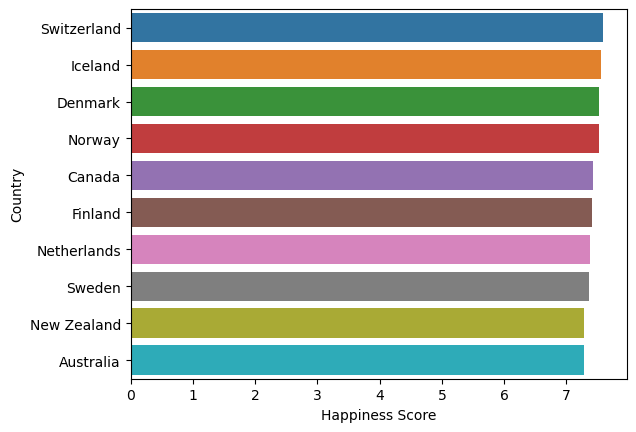

In [14]:
sns.barplot(df, y = df['Country'].head(10), x = df['Happiness Score'])

<Axes: xlabel='Happiness Score', ylabel='Country'>

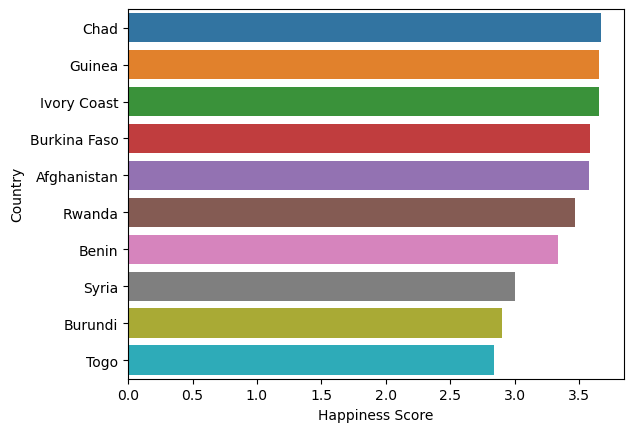

In [15]:
sns.barplot(df, y = df['Country'].tail(10), x = df['Happiness Score'])

From above barplots, we can see top 5 and botom 5 countries by happiness rank.

<Axes: xlabel='Happiness Score', ylabel='Country'>

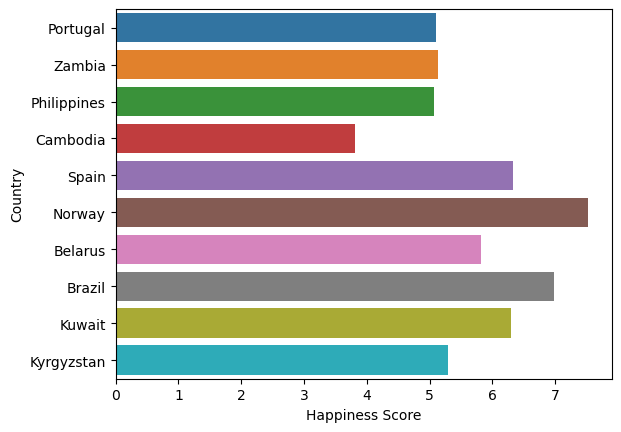

In [16]:
sns.barplot(df, y = df['Country'].sample(10), x = df['Happiness Score'])

Above fig show sample 10 countries happiness score

<Axes: xlabel='Happiness Score', ylabel='Density'>

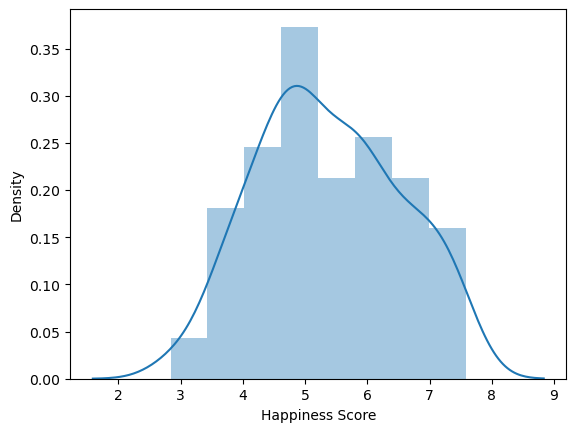

In [17]:
sns.distplot(df['Happiness Score'])

We will consider numerical datatypes for further analysis

In [18]:
df_new = df.iloc[:,3:]
df_new

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [19]:
df.shape

(158, 12)

In [20]:
df_new.shape

(158, 9)

In [21]:
df1 = df_new.iloc[:,1:]
df1

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
153,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


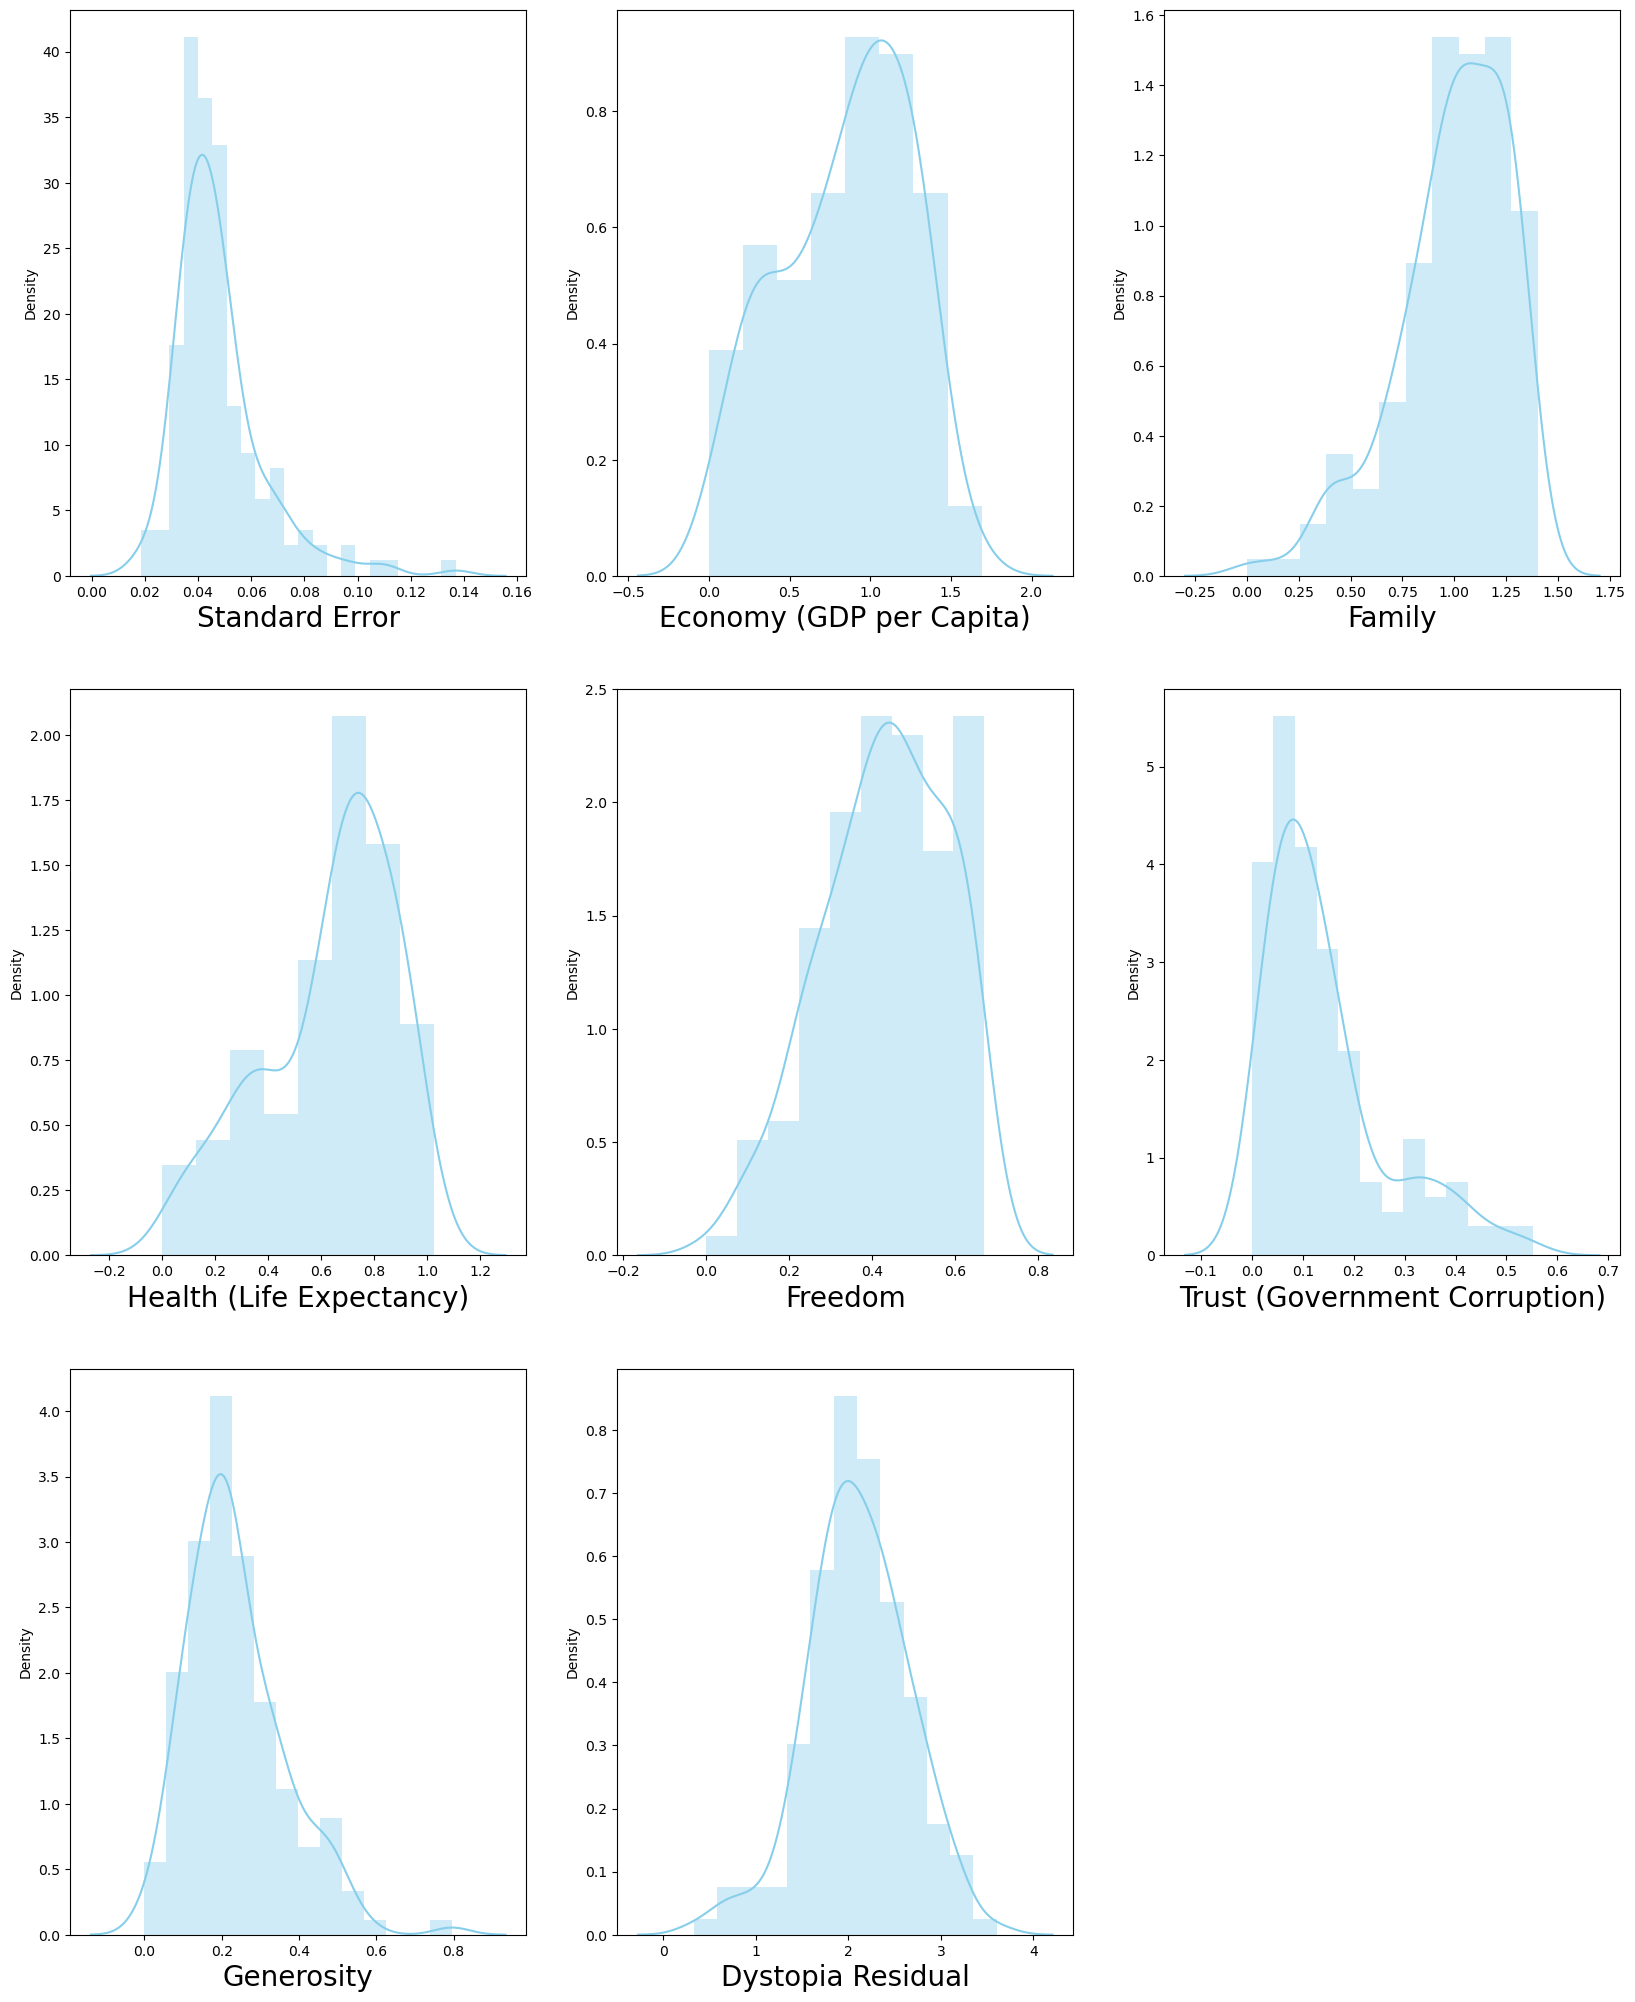

In [22]:
plt.figure(figsize=(20,25))
plot =1
for i in df1:
    if plot <=9:
        ax = plt.subplot(3,3,plot)
        sns.distplot(df1[i], color='skyblue')
        plt.xlabel(i,fontsize=20)
    plot +=1
plt.show()

From above distplot, we can see the skewness present in the dataset.

In [23]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

Happiness Rank                      Axes(0.125,0.712609;0.227941x0.167391)
Happiness Score                  Axes(0.398529,0.712609;0.227941x0.167391)
Standard Error                   Axes(0.672059,0.712609;0.227941x0.167391)
Economy (GDP per Capita)            Axes(0.125,0.511739;0.227941x0.167391)
Family                           Axes(0.398529,0.511739;0.227941x0.167391)
Health (Life Expectancy)         Axes(0.672059,0.511739;0.227941x0.167391)
Freedom                              Axes(0.125,0.31087;0.227941x0.167391)
Trust (Government Corruption)     Axes(0.398529,0.31087;0.227941x0.167391)
Generosity                        Axes(0.672059,0.31087;0.227941x0.167391)
Dystopia Residual                       Axes(0.125,0.11;0.227941x0.167391)
dtype: object

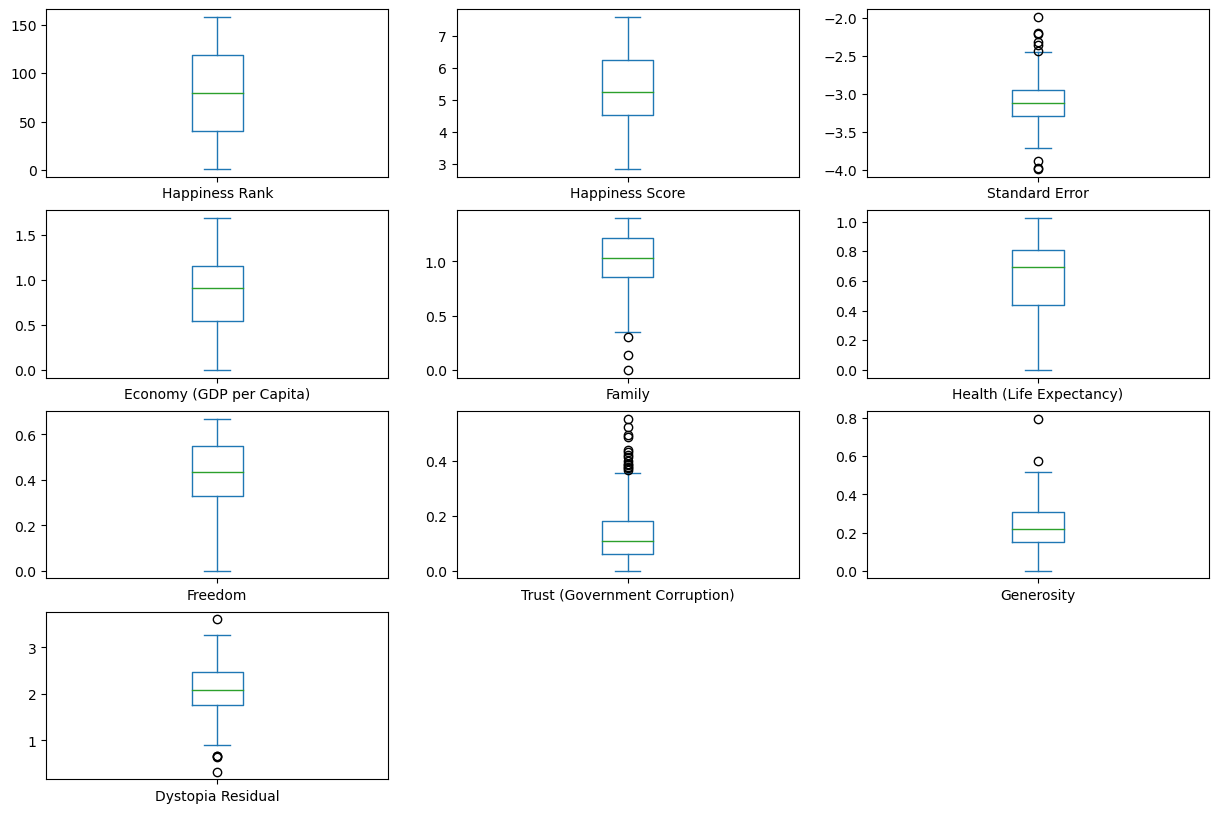

In [47]:
df.plot(kind = 'box', subplots = True, layout=(4,3), figsize = (15,10))

we will remove the skewness using boxcox method for Standard Error. 

In [24]:
from scipy.stats import boxcox

In [25]:
df['Standard Error'] = boxcox(df['Standard Error'],0)

In [26]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   0.484623
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

**5. Multicollinearity**

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [28]:
def vif(df1):
    vif = pd.DataFrame()
    vif['Variables'] = df1.columns
    vif['VIF Factor'] = [variance_inflation_factor(df1.values, i)for i in range(df1.shape[1])]
    return vif

In [29]:
vif(df1)

,Variables,VIF Factor
0,Standard Error,7.166167
1,Economy (GDP per Capita),21.759914
2,Family,25.636995
3,Health (Life Expectancy),23.090959
4,Freedom,15.880880
5,Trust (Government Corruption),3.497600
6,Generosity,5.600094
7,Dystopia Residual,12.574726


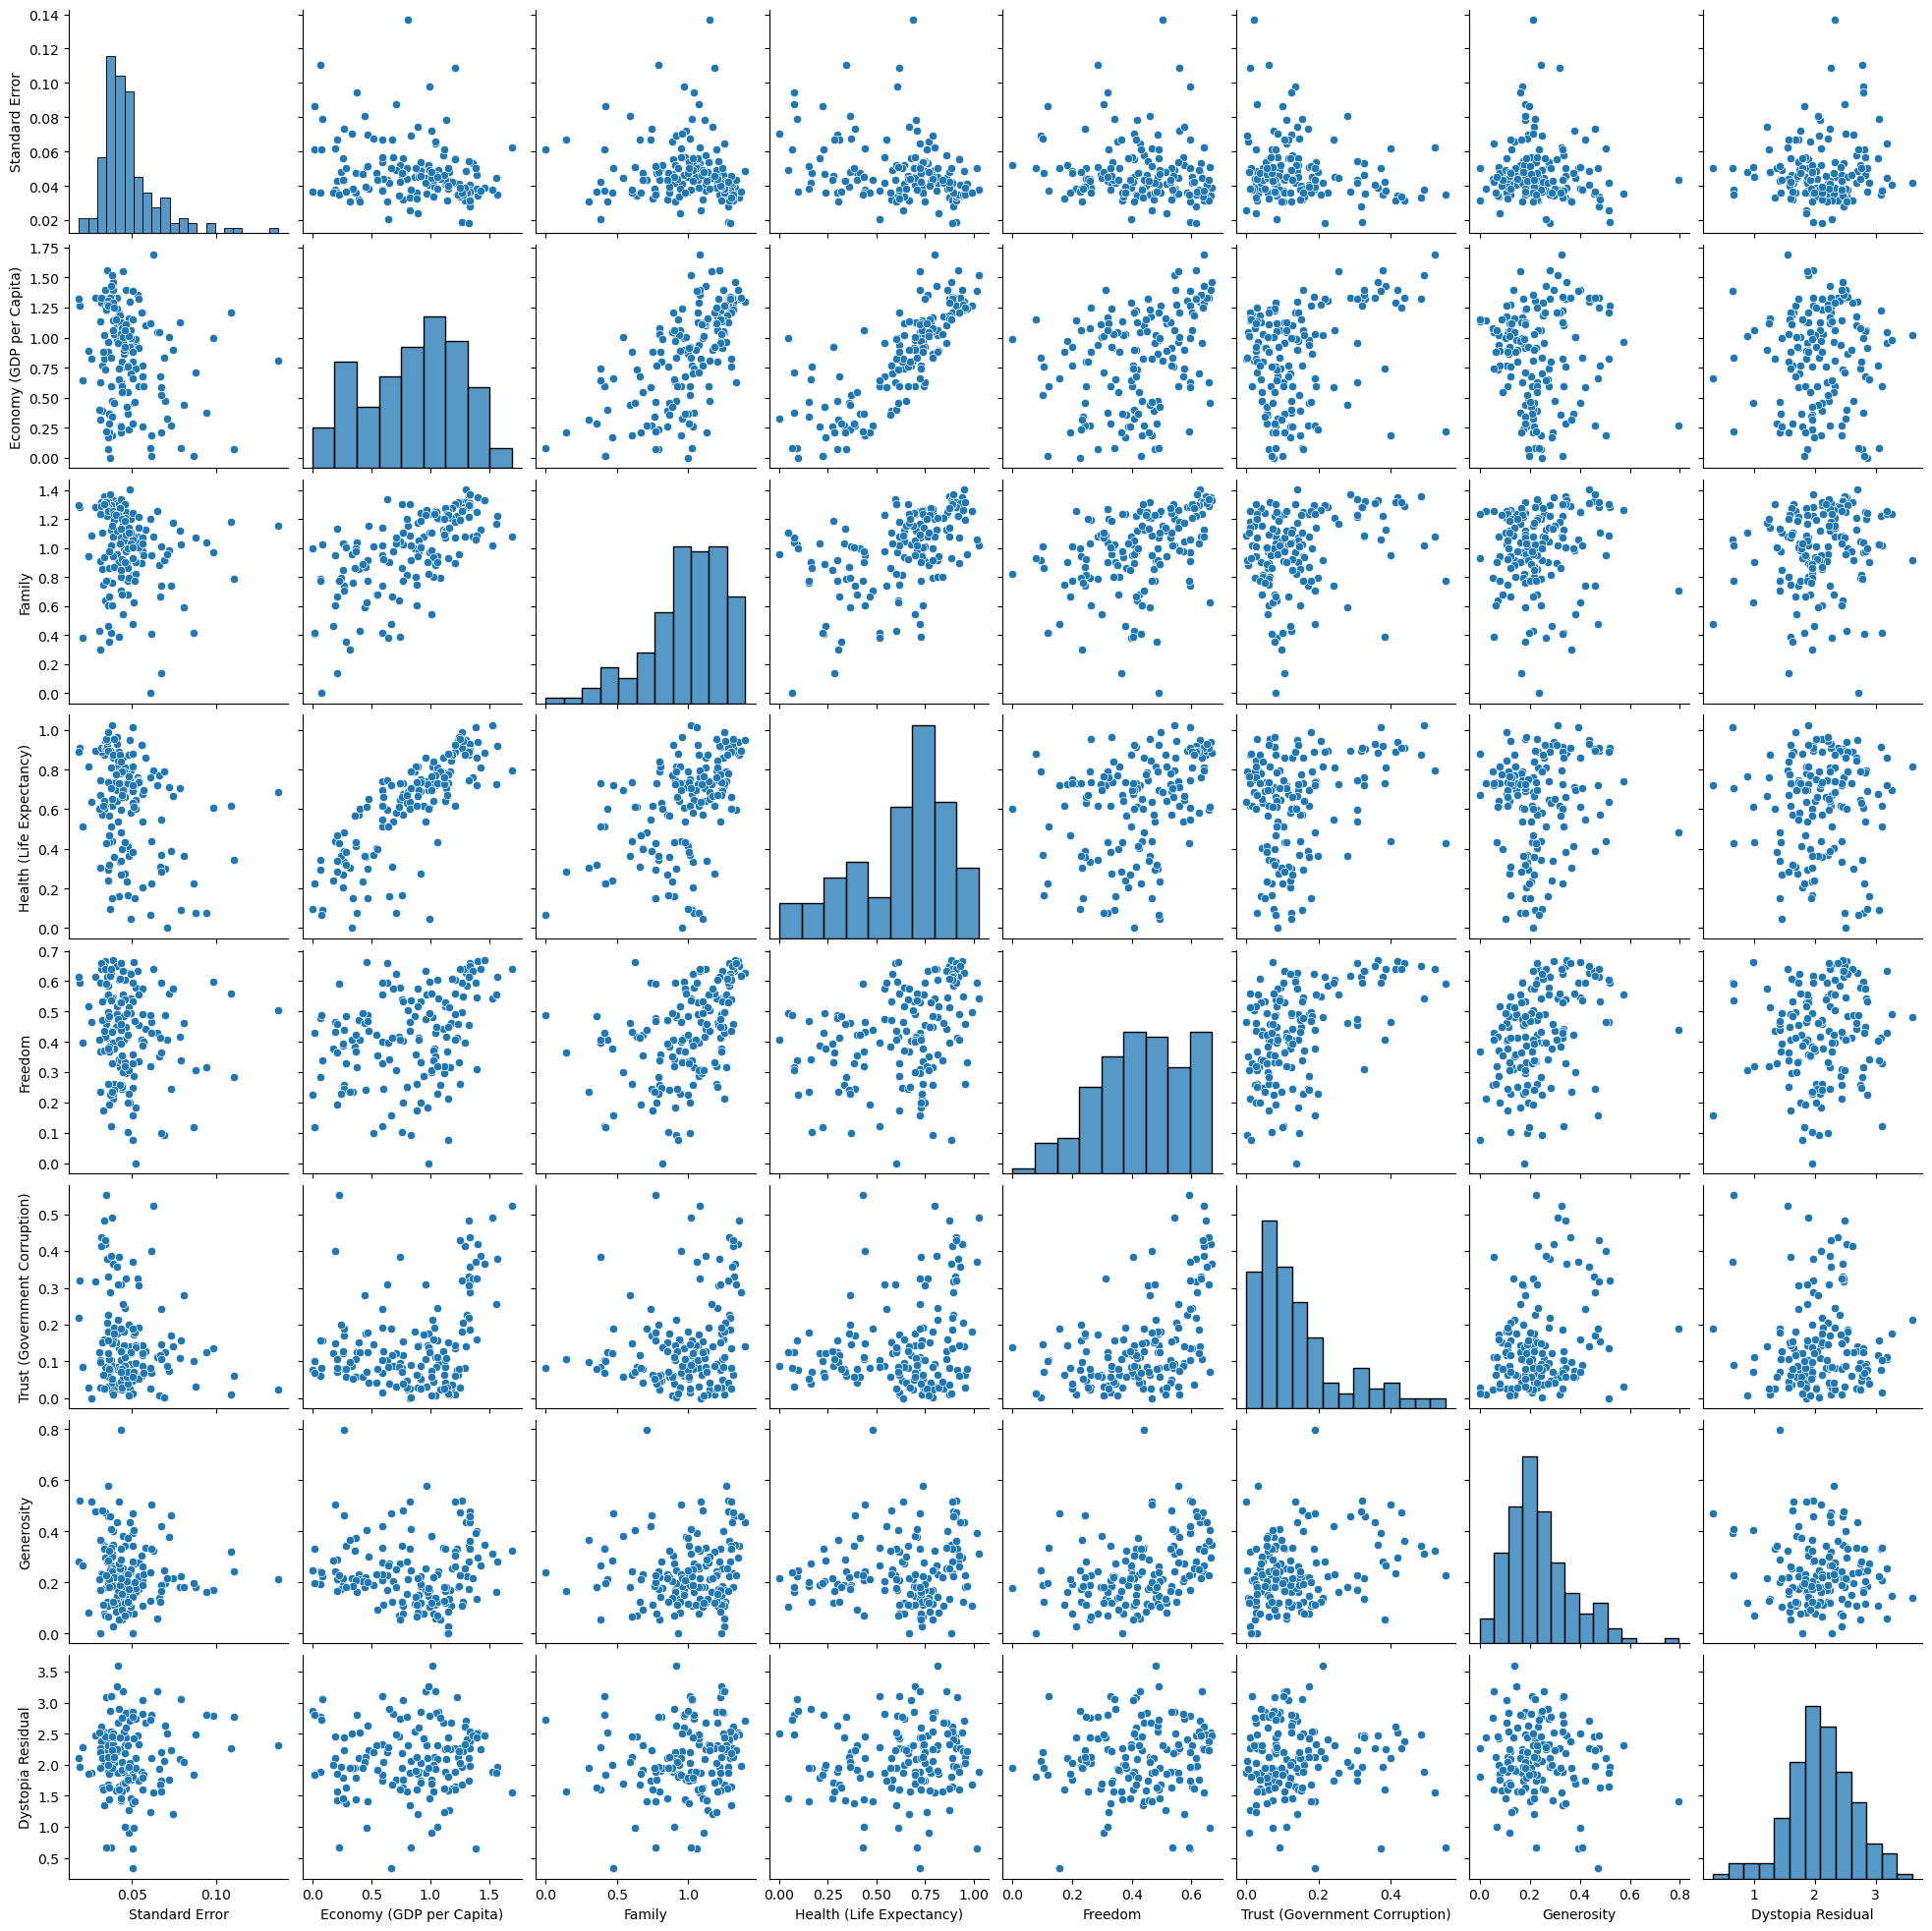

In [30]:
sns.pairplot(df1)

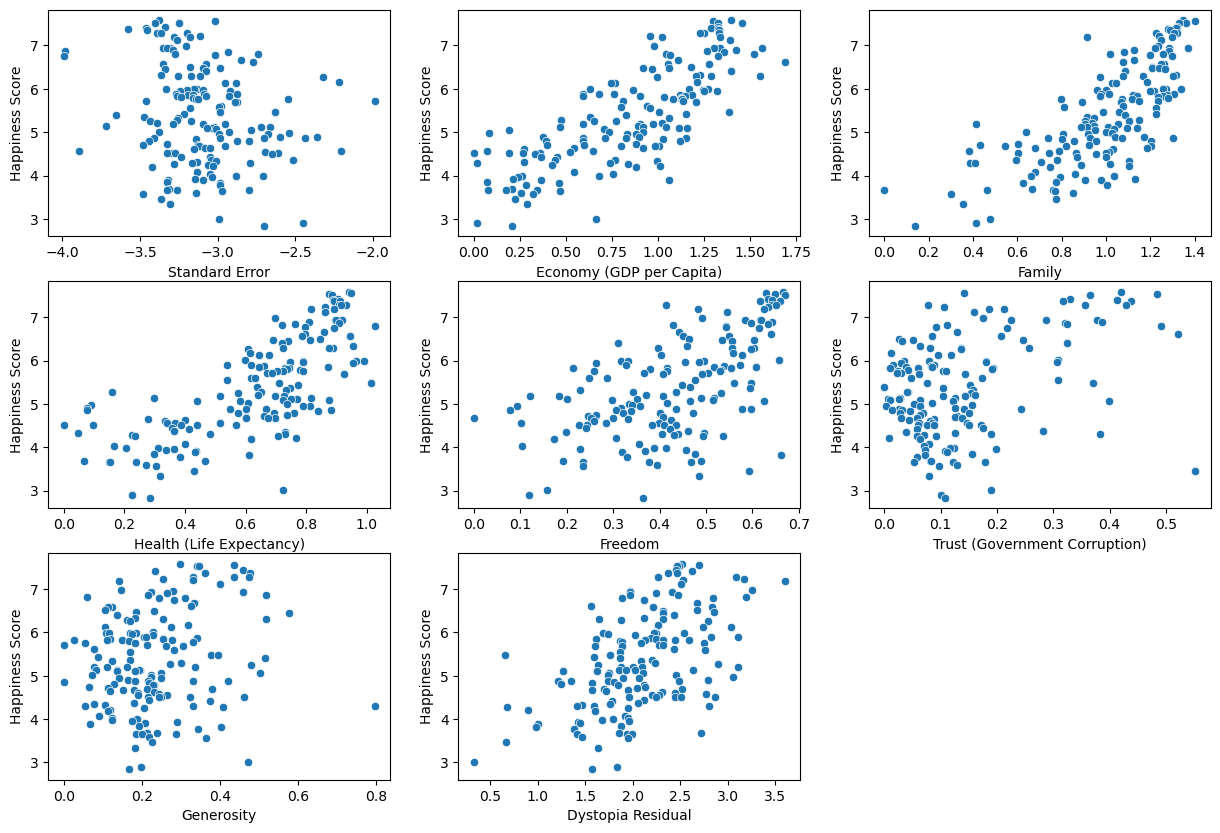

In [31]:
plt.figure(figsize = (15,10))
plot = 1

for i in df1:
    if plot <= 9:
        ax = plt.subplot(3,3, plot)
        sns.scatterplot(x=df[i], y = df['Happiness Score'])
    plot += 1
plt.show()

Above scatterplots indiacates, how all key variables contributes to calculate the happiness score of each country.

In [32]:
df1.corr()

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Standard Error,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


corr function shows the correlation between all the columns

<Axes: >

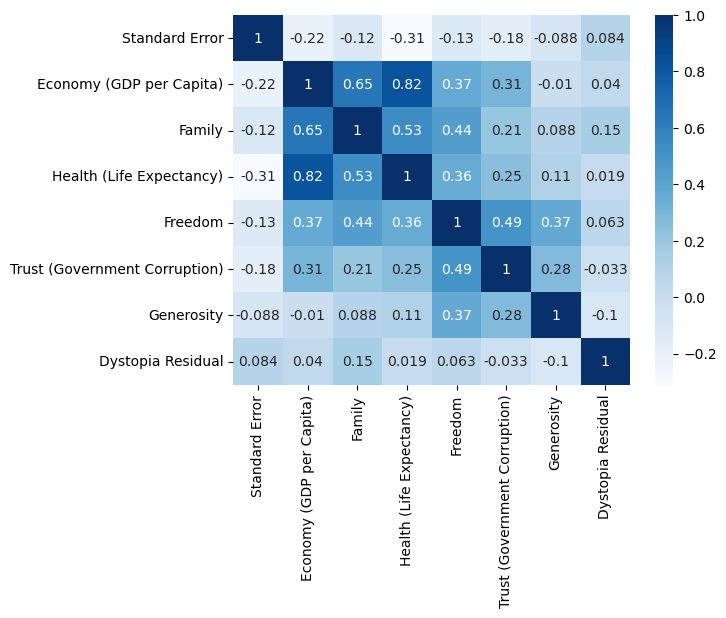

In [49]:
sns.heatmap(df1.corr(), annot = True, cmap = 'Blues')

Above heatmap shows correlatio between the key attributes 

In [35]:
grp = df.groupby('Region')
grp['Happiness Score'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Australia and New Zealand,2.0,7.285000,0.001414,7.284,7.28450,7.285,7.28550,7.286
Central and Eastern Europe,29.0,5.332931,0.570446,4.218,4.95900,5.286,5.81300,6.505
Eastern Asia,6.0,5.626167,0.554053,4.874,5.22350,5.729,5.98625,6.298
Latin America and Caribbean,22.0,6.144682,0.728560,4.518,5.84050,6.149,6.64600,7.226
Middle East and Northern Africa,20.0,5.406900,1.101382,3.006,4.70775,5.262,6.32400,7.278
North America,2.0,7.273000,0.217789,7.119,7.19600,7.273,7.35000,7.427
Southeastern Asia,9.0,5.317444,0.950020,3.819,4.87600,5.360,5.77000,6.798
Southern Asia,7.0,4.580857,0.570526,3.575,4.39250,4.565,4.94400,5.253
Sub-Saharan Africa,40.0,4.202800,0.609557,2.839,3.75600,4.272,4.58075,5.477


Australia and New Zealand region are the happiest region in the world with the score of 7.28, while sub-saharan africa is least happiest region with score of 4.20.

**6. Machine Learning Algorithm**

In [52]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,-3.378165,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,-3.019206,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,-3.402799,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,-3.249335,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,-3.337378,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,-3.362746,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,-3.308801,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,-2.992737,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,-2.446686,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [53]:
x = df.iloc[:,4:]
x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-3.378165,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,-3.019206,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,-3.402799,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,-3.249335,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,-3.337378,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
153,-3.362746,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,-3.308801,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,-2.992737,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,-2.446686,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [54]:
y = df.iloc[:,3]
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

We need to determine the factor which are contributing to the happiness score. Therefore, out target variable is 'Happiness Score' and rest are independent variables.

In [55]:
x.shape

(158, 8)

In [56]:
y.shape

(158,)

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .20, random_state = 42)

In [62]:
x_train.shape

(126, 8)

In [63]:
x_test.shape

(32, 8)

In [65]:
lm = LinearRegression()

In [66]:
lm.fit(x_train, y_train)

LinearRegression()

In [67]:
lmpred = lm.predict(x_test)

In [68]:
lm.score(x_train,y_train)

0.9999999391702178

In [70]:
print(mean_absolute_error(y_test, lmpred))
print(mean_squared_error(y_test, lmpred))
print(np.sqrt(mean_squared_error(y_test, lmpred)))

0.0002306891953560014
7.436045423315672e-08
0.0002726911333966631


In [72]:
print('R2 Score:', r2_score(y_test, lmpred))

R2 Score: 0.9999999475873698


In [88]:
rf = RandomForestRegressor(n_estimators = 100)
sv = SVR()
dtr = DecisionTreeRegressor()
adr = AdaBoostRegressor()

model = [rf,sv,dtr,adr]

for i in model:
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    i.score(x_train,y_train)
    
    print('\nError:', i,'\n')
    print('mean_squared_error',mean_squared_error(y_test, pred))
    print('mean_absolute_error',mean_absolute_error(y_test, pred))
    print('oot_mean_squared_error',np.sqrt(mean_squared_error(y_test, pred)))
    print('R2 Score:', r2_score(y_test, pred) )


Error: RandomForestRegressor() 

mean_squared_error 0.09167976865625002
mean_absolute_error 0.24361624999999998
oot_mean_squared_error 0.30278667186032154
R2 Score: 0.9353799293020295

Error: SVR() 

mean_squared_error 0.01277647983961886
mean_absolute_error 0.08716864659946767
oot_mean_squared_error 0.11303309179005439
R2 Score: 0.9909945559133881

Error: DecisionTreeRegressor() 

mean_squared_error 0.3155770625
mean_absolute_error 0.46131250000000007
oot_mean_squared_error 0.5617624609209839
R2 Score: 0.7775669333779713

Error: AdaBoostRegressor() 

mean_squared_error 0.1163294797413944
mean_absolute_error 0.2689249496302587
oot_mean_squared_error 0.34107107725721103
R2 Score: 0.918005691819178


So from above observation, we can determine that Linear Regression model fits well and gives good accuracy.

**7. Cross Validation Score**

In [94]:
score = cross_val_score(lm, x, y, cv = 5)
print('Score:',score)
print('Mean:',score.mean())
print('Standard Deviation:', score.std())

Score: [0.99999944 0.99999834 0.99999836 0.99999536 0.99999943]
Mean: 0.9999981859701389
Standard Deviation: 1.4945575226495029e-06


**8. Saving the best Model**

In [95]:
import joblib

In [96]:
joblib.dump(lm,'LinearModel.obj')
best_model = joblib.load('LinearModel.obj')